<a href="https://colab.research.google.com/github/Ribeirotmr/Traveling-Salesman-Problem-/blob/main/Classical-TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Melhor rota encontrada: [15, 16, 4, 9, 8, 19, 10, 5, 18, 12, 17, 1, 3, 0, 13, 2, 14, 7, 11, 6]
Custo total da rota: 1018.6469820626


<ipython-input-1-b79c00bb4183>:87: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(


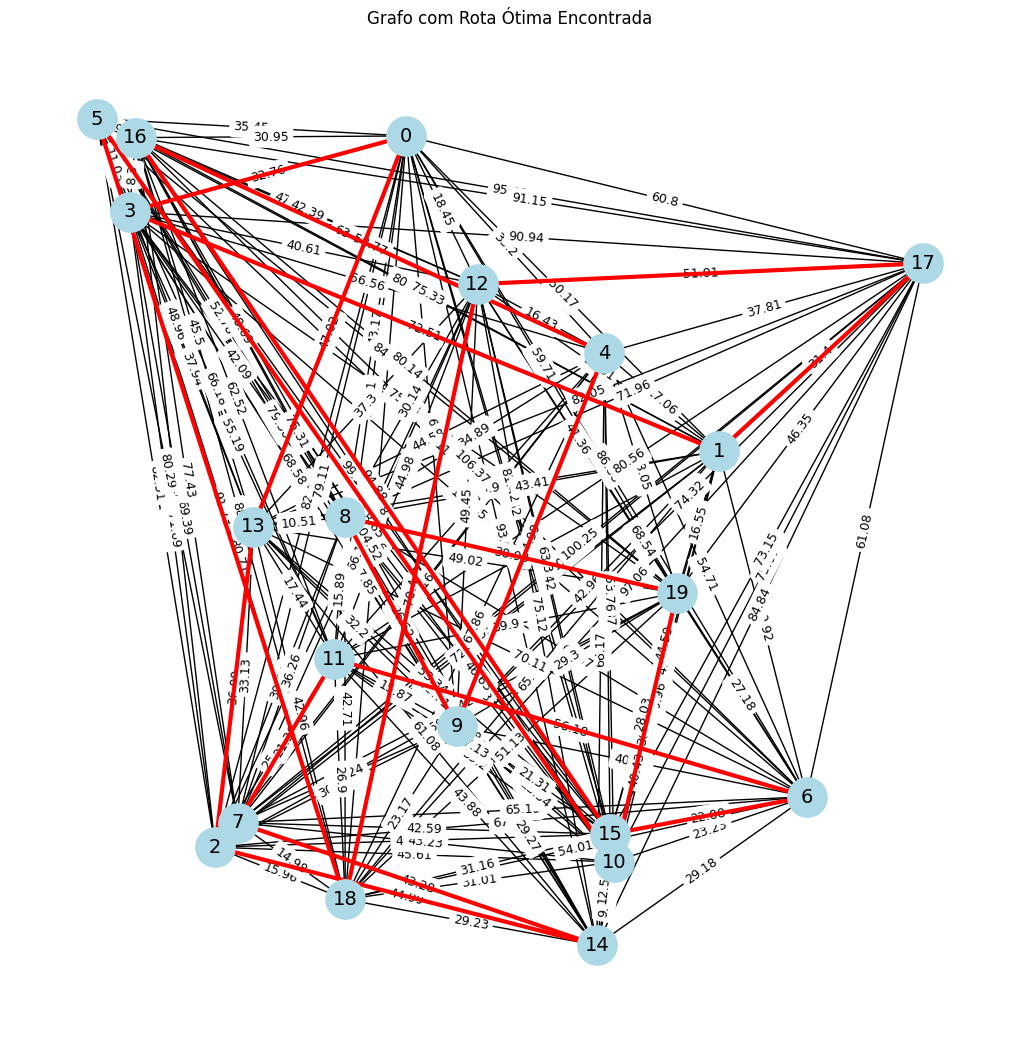

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import networkx as nx


np.random.seed(42)
cities = np.random.rand(20, 2) * 100
n = len(cities)


def distance_matrix(cities):
    n = len(cities)
    dist = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            dist[i][j] = np.linalg.norm(cities[i] - cities[j])
    return dist

D = distance_matrix(cities)

def initial_state(n):
    state = np.zeros((n, n))
    perm = np.random.permutation(n)
    for t in range(n):
        state[t][perm[t]] = 1
    return state.flatten()

def binary_to_order(state):
    n = int(np.sqrt(len(state)))
    order = []
    state = state.reshape((n, n))
    for t in range(n):
        for i in range(n):
            if round(state[t][i]) == 1:
                order.append(i)
    return order


def solution_cost(order, D):
    cost = 0
    for i in range(len(order) - 1):
        cost += D[order[i], order[i + 1]]
    cost += D[order[-1], order[0]]
    return cost


def cost_function(state, D):
    n = int(np.sqrt(len(state)))
    state = np.round(state)
    order = binary_to_order(state)
    if len(order) != n or len(set(order)) != n:
        return 1e6
    return solution_cost(order, D)

def qaoa_simulation(D, max_iter=200):
    n = len(D)
    x0 = initial_state(n)

    res = minimize(lambda x: cost_function(x, D),
                   x0, method='COBYLA', options={'maxiter': max_iter})

    final_order = binary_to_order(res.x)
    final_cost = cost_function(res.x, D)

    return final_order, final_cost, res


def plot_graph(cities, D, route=None):
    G = nx.Graph()
    for i, coord in enumerate(cities):
        G.add_node(i, pos=tuple(coord))

    for i in range(len(cities)):
        for j in range(i + 1, len(cities)):
            G.add_edge(i, j, weight=round(D[i][j], 2))

    pos = nx.get_node_attributes(G, 'pos')
    edge_labels = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(10, 10))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800, font_size=14)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

    if route:
        path_edges = list(zip(route, route[1:] + [route[0]]))
        nx.draw_networkx_edges(
            G, pos,
            edgelist=path_edges,
            edge_color='red',
            width=3,
            connectionstyle='arc3,rad=0.1'
        )

    plt.title("Grafo com Rota Ótima Encontrada")
    plt.grid(True)
    plt.show()


order, cost, res = qaoa_simulation(D)
print(f"Melhor rota encontrada: {order}")
print(f"Custo total da rota: {cost:.10f}")


plot_graph(cities, D, route=order)


